<a href="https://colab.research.google.com/github/gokturkberke/tensorflow-deeplearning/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is practice of writing algorithms which can discover patterns is visual data. Such as the camera of self-driving car recognizing the car in front

## Get the data

The images we're working with are from the Food101 dataset(kaggle) it only uses two classes (pizza & steak)

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-09-15 07:34:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.207, 142.250.125.207, 192.178.129.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  84.3MB/s    in 1.2s    

2025-09-15 07:34:52 (84.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
import os

#list number of files on pizza_steak
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [4]:
#Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Created a list of class_names from the subdirectory
#"*" pattern'i "her şey" anlamına gelir, yani o dizindeki tüm içeriği getirir
print(class_names)

['pizza' 'steak']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class): #ana dizin yolu ve class adi
  #Setup the target directory
  target_folder = target_dir + target_class #bu ikisiin birlestirir
  #Get a random image path
  random_image = random.sample(os.listdir(target_folder),1) #os.listdir(target_folder): Klasördeki tüm dosyaları listeler

  #Read in the image and plot
  img = mpimg.imread(target_folder + "/" + random_image[0]) #listeden ilk ve tek elemani alir daha sonra tam dosya yolunu olusturur = "pizza_steak/test/pizza/pizza_001.jpg" mesela
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #Show the shape of the image

  return img

Image shape: (512, 512, 3)


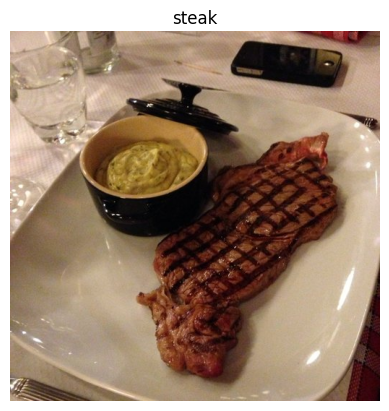

In [13]:
img = view_random_image(target_dir = "pizza_steak/train/",target_class="steak")

In [14]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[200, 176, 150],
        [196, 172, 146],
        [195, 169, 146],
        ...,
        [122,  79,  63],
        [119,  76,  60],
        [107,  64,  48]],

       [[199, 175, 149],
        [197, 173, 147],
        [199, 173, 150],
        ...,
        [116,  73,  57],
        [115,  72,  56],
        [115,  72,  56]],

       [[199, 175, 151],
        [197, 173, 149],
        [200, 174, 151],
        ...,
        [115,  72,  56],
        [116,  73,  57],
        [119,  76,  60]],

       ...,

       [[181, 160, 129],
        [182, 161, 130],
        [182, 158, 130],
        ...,
        [ 17,   5,   9],
        [ 12,   3,   8],
        [  8,   2,   6]],

       [[184, 163, 132],
        [185, 164, 133],
        [184, 163, 134],
        ...,
        [ 15,   3,   7],
        [ 11,   2,   7],
        [  7,   2,   6]],

       [[189, 168, 137],
        [183, 162, 131],
        [178, 157, 128],
        ...,
        [ 13,   1,   